In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Load csv data
df = pd.read_csv('../data/user_analysis.csv')
df.head()

,MSISDN/Number,Handset Type,Handset Manufacturer,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),...,Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other UL (Bytes),Total UL (Bytes).1,Other DL (Bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,Samsung,1.311448e+19,1823652.0,308879636.0,36749741.0,1545765.0,24420.0,1634479.0,...,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,8814393.0,36749741.0,171744450.0
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),Samsung,1.311448e+19,1365104.0,653384965.0,53800391.0,1926113.0,7165.0,3493924.0,...,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,15055145.0,53800391.0,526904238.0
2,3.376063e+10,Samsung Galaxy A8 (2018),Samsung,1.311448e+19,1361762.0,279807335.0,27883638.0,1684053.0,42224.0,8535055.0,...,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,4215763.0,27883638.0,410692588.0
3,3.375034e+10,Huawei B528S-23A,undefined,1.311448e+19,1321509.0,846028530.0,43324218.0,644121.0,13372.0,9023734.0,...,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,12797283.0,43324218.0,749039933.0
4,3.369980e+10,Samsung Sm-G390F,Samsung,1.311448e+19,1089009.0,569138589.0,38542814.0,862600.0,50188.0,6248284.0,...,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,13910322.0,38542814.0,550709500.0


## Task 3

#### user engagement analysis using session frequency, duration of a session, session total traffic per user

In [5]:
# top 10 customers based on session frequency
session_frequency_per_customer = df.groupby('MSISDN/Number')['Bearer Id'].count().reset_index(name='Sessions Frequency')
top_10_session_frequency =  session_frequency_per_customer.sort_values(by='Sessions Frequency',ascending=False).head(10)
top_10_session_frequency

,MSISDN/Number,Sessions Frequency
53644,3.366371e+10,1067
13526,3.362632e+10,18
6437,3.361489e+10,17
13180,3.362578e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
1279,3.360452e+10,12
92577,3.376041e+10,12


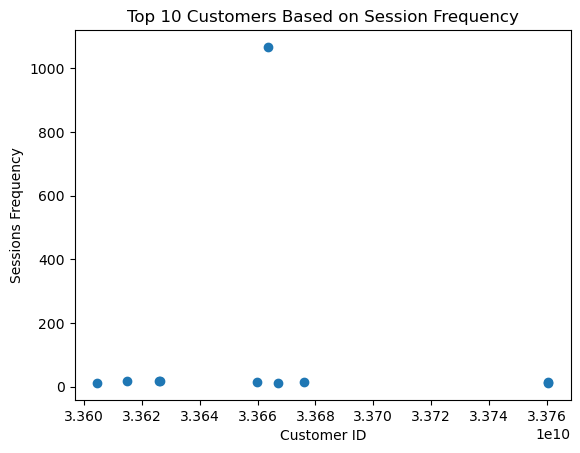

In [6]:
plt.scatter(top_10_session_frequency["MSISDN/Number"], top_10_session_frequency["Sessions Frequency"])
plt.xlabel("Customer ID")
plt.ylabel("Sessions Frequency")
plt.title("Top 10 Customers Based on Session Frequency")
plt.show()

In [7]:
# top 10 customers based on session duration
session_duration_per_customer = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Session Duration')
top_10_session_duration = session_duration_per_customer.sort_values(by="Session Duration", ascending=False).head(10)
top_10_session_duration

,MSISDN/Number,Session Duration
53644,3.366371e+10,72655568.0
13180,3.362578e+10,18553754.0
6437,3.361489e+10,9966898.0
92923,3.376054e+10,9279434.0
13526,3.362632e+10,8791927.0
65118,3.366716e+10,8744914.0
50281,3.366284e+10,6614270.0
57160,3.366469e+10,6288730.0
666,3.360313e+10,6287761.0
66029,3.366746e+10,5649882.0


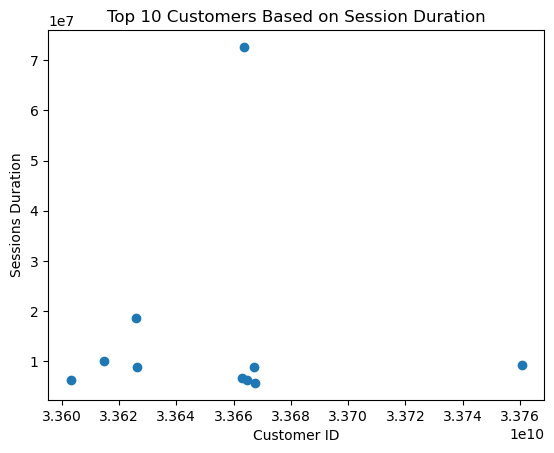

In [8]:
plt.scatter(top_10_session_duration["MSISDN/Number"], top_10_session_duration['Session Duration'])
plt.xlabel("Customer ID")
plt.ylabel("Sessions Duration")
plt.title("Top 10 Customers Based on Session Duration")
plt.show()

In [9]:
# top 10 customers based on total traffic download and upload (bytes)
total_traffic_per_customer = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_traffic_per_customer['Total Traffic (Bytes)'] = total_traffic_per_customer['Total DL (Bytes)'] 
+ total_traffic_per_customer['Total UL (Bytes)']
top_10_customer_total_traffic = total_traffic_per_customer.sort_values(by="Total UL (Bytes)", ascending=False).head(10)
top_10_customer_total_traffic

,MSISDN/Number,Total DL (Bytes),Total UL (Bytes),Total Traffic (Bytes)
53644,3.366371e+10,4.875441e+11,4.441823e+10,4.875441e+11
13180,3.362578e+10,7.770043e+09,7.295774e+08,7.770043e+09
92923,3.376054e+10,7.811295e+09,7.034786e+08,7.811295e+09
6437,3.361489e+10,8.156743e+09,6.894830e+08,8.156743e+09
13526,3.362632e+10,7.301517e+09,6.696507e+08,7.301517e+09
37052,3.365973e+10,7.081602e+09,6.242603e+08,7.081602e+09
76363,3.367588e+10,7.309542e+09,5.815688e+08,7.309542e+09
65118,3.366716e+10,5.052068e+09,5.663264e+08,5.052068e+09
86455,3.369879e+10,6.010556e+09,5.303431e+08,6.010556e+09
92577,3.376041e+10,6.610852e+09,5.215189e+08,6.610852e+09


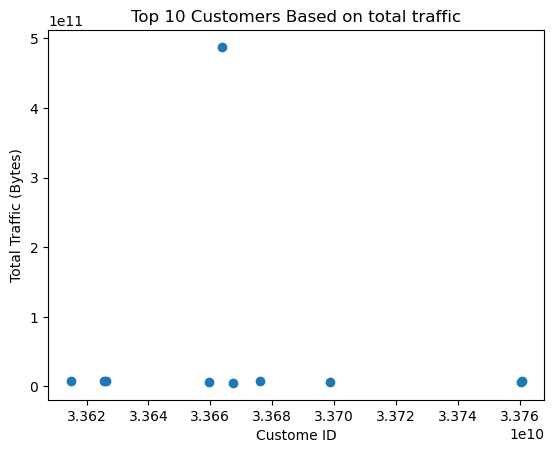

In [10]:
plt.scatter(top_10_customer_total_traffic['MSISDN/Number'], top_10_customer_total_traffic["Total Traffic (Bytes)"])
plt.xlabel("Custome ID")
plt.ylabel("Total Traffic (Bytes)")
plt.title("Top 10 Customers Based on total traffic")
plt.show()

In [11]:
# add one column that has the sum of Total DL (Bytes) and Total UL (Bytes) to get the total traffic
df["Total Traffic (Bytes)"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

/home/ablaze/miniconda3/envs/week_1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


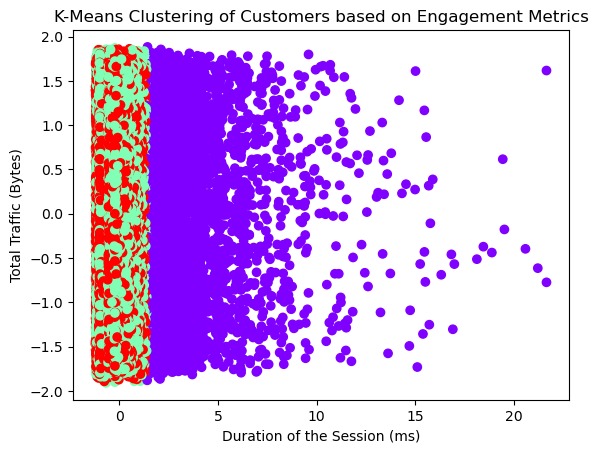

In [44]:
# normalizing Engagement metric and run k-means(k=3) to classify customers in three groupment of engagment
# normalizing columns
columns_to_normalize = ["Bearer Id", "Dur. (ms)", "Total Traffic (Bytes)"]
engagement_metrics = df[columns_to_normalize]
scaler = StandardScaler()
engagement_metrics_normalized = scaler.fit_transform(engagement_metrics)
df_normalized = pd.DataFrame(engagement_metrics_normalized, columns=columns_to_normalize)

# applying k-means
# to do explore more on this topic
kmeans = KMeans(n_clusters=3, random_state=42)
df_normalized['Cluster'] = kmeans.fit_predict(engagement_metrics_normalized)
df['Cluster']  = df_normalized['Cluster']
plt.scatter(df_normalized['Dur. (ms)'], df_normalized['Total Traffic (Bytes)'], c=df_normalized['Cluster'], cmap='rainbow')
plt.xlabel('Duration of the Session (ms)')
plt.ylabel('Total Traffic (Bytes)')
plt.title('K-Means Clustering of Customers based on Engagement Metrics')
plt.show()

In [56]:
# minimum, maximum, average, and total non-normalized metrics for each cluster
clustered_data = df.groupby('Cluster')
cluster_metrics_for_duration = clustered_data["Bearer Id"].agg(['min', 'max', 'mean', 'sum'])
cluster_metrics_for_duration

,min,max,mean,sum
Cluster,,,,
0,6.917538e+18,1.318654e+19,1.003149e+19,1.026723e+23
1,1.268214e+19,1.318654e+19,1.307044e+19,8.975866e+23
2,6.917538e+18,1.013887e+19,7.322556e+18,5.205825e+23


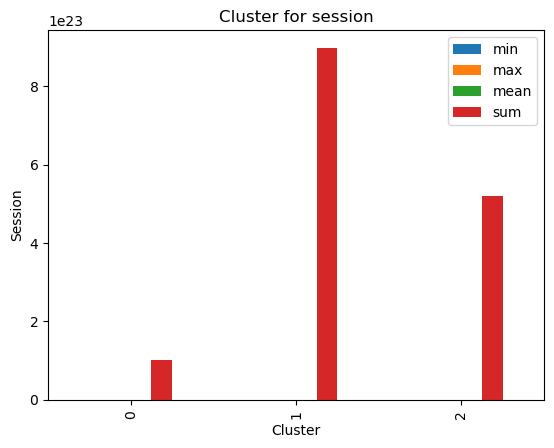

In [57]:
cluster_metrics_for_duration.plot(kind='bar', title="Cluster for session")
plt.ylabel('Session')
plt.xlabel('Cluster')
plt.show()

In [58]:
cluster_metrics_for_session = clustered_data["Dur. (ms)"].agg(['min', 'max', 'mean', 'sum'])
cluster_metrics_for_duration

,min,max,mean,sum
Cluster,,,,
0,6.917538e+18,1.318654e+19,1.003149e+19,1.026723e+23
1,1.268214e+19,1.318654e+19,1.307044e+19,8.975866e+23
2,6.917538e+18,1.013887e+19,7.322556e+18,5.205825e+23


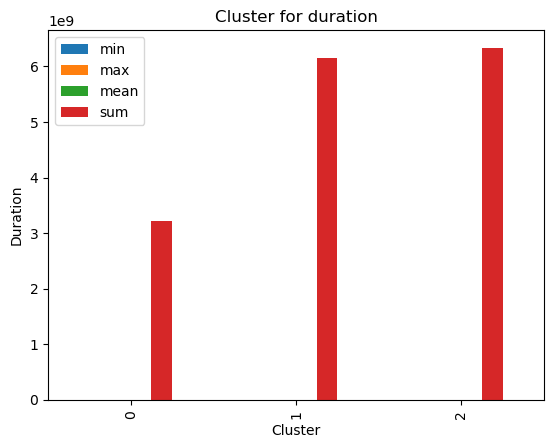

In [59]:
cluster_metrics_for_session.plot(kind='bar', title="Cluster for duration")
plt.ylabel('Duration')
plt.xlabel('Cluster')
plt.show()

In [55]:
cluster_metrics_for_traffic = clustered_data["Total Traffic (Bytes)"].agg(['min', 'max', 'mean', 'sum'])
cluster_metrics_for_traffic

,min,max,mean,sum
Cluster,,,,
0,36149926.0,955984776.0,4.986261e+08,5.103438e+12
1,28956107.0,952641334.0,4.957271e+08,3.404307e+13
2,33249009.0,950760661.0,4.953889e+08,3.521868e+13


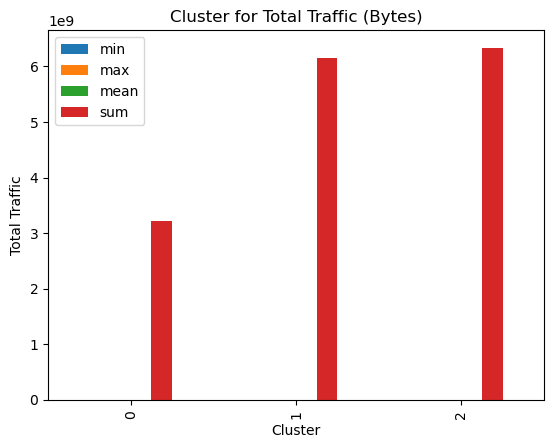

In [60]:
cluster_metrics_for_session.plot(kind='bar', title="Cluster for Total Traffic (Bytes)")
plt.ylabel('Total Traffic')
plt.xlabel('Cluster')
plt.show()

#### Interpretation to do

In [69]:
# Aggregate user total traffic per application and derive the top 10 most engaged users per application
application_columns = ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']
for app in application_columns:
    df[f'Total {app} Traffic (Bytes)'] = df[f'{app} DL (Bytes)'] + df[f'{app} UL (Bytes)']
user_total_traffic_per_app = df.groupby('MSISDN/Number')[[f'Total {app} Traffic (Bytes)' for app in application_columns]].sum()
# to do figure out the top 10 user per application

Top 10 users for Social Media:
MSISDN/Number
3.360313e+10    10.0
3.361489e+10     5.0
3.362578e+10     6.0
3.362632e+10     2.0
3.365973e+10     4.0
3.366371e+10     1.0
3.366716e+10     7.0
3.366907e+10     9.0
3.376054e+10     3.0
3.378632e+10     8.0
Name: Total Social Media Traffic (Bytes), dtype: float64

Top 10 users for Youtube:
MSISDN/Number
3.361489e+10     4.0
3.362578e+10     2.0
3.362632e+10     5.0
3.362708e+10     8.0
3.366371e+10     1.0
3.366716e+10     7.0
3.367588e+10     6.0
3.369879e+10    10.0
3.376041e+10     9.0
3.376054e+10     3.0
Name: Total Youtube Traffic (Bytes), dtype: float64

Top 10 users for Netflix:
MSISDN/Number
3.361489e+10     3.0
3.362578e+10     4.0
3.362632e+10     6.0
3.365973e+10     2.0
3.366371e+10     1.0
3.366716e+10     8.0
3.367588e+10     9.0
3.376041e+10     7.0
3.376054e+10     5.0
3.378632e+10    10.0
Name: Total Netflix Traffic (Bytes), dtype: float64

Top 10 users for Google:
MSISDN/Number
3.361489e+10     4.0
3.362578e+10     3.0


In [70]:
df

,MSISDN/Number,Handset Type,Handset Manufacturer,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),...,Total Traffic (Bytes),Duration_Cluster,Cluster,Total Social Media Traffic (Bytes),Total Youtube Traffic (Bytes),Total Netflix Traffic (Bytes),Total Google Traffic (Bytes),Total Email Traffic (Bytes),Total Gaming Traffic (Bytes),Total Other Traffic (Bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,Samsung,1.311448e+19,1823652.0,3.088796e+08,3.674974e+07,1.545765e+06,24420.00000,1.634479e+06,...,3.456294e+08,2,0,1.570185e+06,1.835594e+07,1.785519e+07,2.905912e+06,3.701304e+06,2.924265e+08,1.805588e+08
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),Samsung,1.311448e+19,1365104.0,6.533850e+08,5.380039e+07,1.926113e+06,7165.00000,3.493924e+06,...,7.071854e+08,2,0,1.933278e+06,3.935912e+07,3.556554e+07,4.414096e+06,9.373850e+05,6.099208e+08,5.419594e+08
2,3.376063e+10,Samsung Galaxy A8 (2018),Samsung,1.311448e+19,1361762.0,2.798073e+08,2.788364e+07,1.684053e+06,42224.00000,8.535055e+06,...,3.076910e+08,2,0,1.726277e+06,3.442524e+07,2.375120e+07,1.022912e+07,3.363124e+06,2.299803e+08,4.149084e+08
3,3.375034e+10,Huawei B528S-23A,undefined,1.311448e+19,1321509.0,8.460285e+08,4.332422e+07,6.441210e+05,13372.00000,9.023734e+06,...,8.893527e+08,2,0,6.574930e+05,3.653476e+07,1.509259e+07,1.181176e+07,2.070983e+06,8.103879e+08,7.618372e+08
4,3.369980e+10,Samsung Sm-G390F,Samsung,1.311448e+19,1089009.0,5.691386e+08,3.854281e+07,8.626000e+05,50188.00000,6.248284e+06,...,6.076814e+08,2,0,9.127880e+05,3.422225e+07,1.753980e+07,7.748843e+06,2.110349e+06,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,3.365069e+10,Apple iPhone 8 Plus (A1897),Apple,7.277826e+18,81230.0,5.741753e+08,5.762885e+07,3.464974e+06,52091.00000,9.967603e+06,...,6.318041e+08,0,2,3.517065e+06,2.795510e+07,3.756186e+07,1.278491e+07,6.908760e+05,5.358069e+08,1.675193e+07
149997,3.366345e+10,Apple iPhone Se (A1723),Apple,7.349883e+18,97970.0,6.666488e+08,3.913508e+07,2.344568e+06,7613.00000,2.229420e+06,...,7.057839e+08,0,2,2.352181e+06,2.216552e+07,4.064329e+07,4.415361e+06,2.121718e+06,6.316281e+08,7.146381e+08
149998,3.362189e+10,Apple iPhone Xs (A2097),Apple,1.311448e+19,98249.0,5.927864e+08,3.491222e+07,1.245845e+06,14394.00000,3.850890e+06,...,6.276986e+08,0,1,1.260239e+06,2.451641e+07,1.502970e+07,6.585469e+06,2.058277e+06,5.669338e+08,1.324156e+08
149999,3.361962e+10,Huawei Fig-Lx1,Huawei,1.311448e+19,97910.0,3.718959e+08,2.962610e+07,8.015470e+05,21562.00000,4.189773e+06,...,4.015220e+08,0,1,8.231090e+05,1.712251e+07,1.649484e+07,7.757267e+06,2.850914e+06,3.550664e+08,8.161200e+08


In [78]:
# top 3 most used applications
# assuming application with most traffic are the the top used by customers
last_7_columns = df.iloc[:, -7:]
column_sums = last_7_columns.sum()
sum_df = pd.DataFrame({'Column': column_sums.index, 'Sum': column_sums.values})
top_3_application = sum_df.sort_values(by='Sum', ascending=False).head(3)
top_3_application

,Column,Sum
5,Total Gaming Traffic (Bytes),6.455040e+13
6,Total Other Traffic (Bytes),6.440523e+13
1,Total Youtube Traffic (Bytes),3.396545e+12


In [79]:
# to do What is the optimized value of k